<a href="https://colab.research.google.com/github/naz44/Random-stuff/blob/master/DMCBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Crime rate prediction using python and Decision Trees Classifier

In [0]:
pip  install scikit-learn==0.19.1

In [0]:
import pandas as pd # panda's nickname is pd
import numpy as np
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from  sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import binarize
import matplotlib.pyplot as plot
from sklearn import linear_model
from IPython.display import Image 
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
import sklearn.preprocessing as prep
import pydotplus 
import math
from sklearn.linear_model import RidgeCV
import sklearn.linear_model as linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [0]:
communities_crime_df = pd.read_csv('communities-crime-clean.csv')
# Sanity test we have good data
communities_crime_df.head()

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,...,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,1,Alabastercity,7,0.01,0.61,0.21,0.83,0.02,0.01,0.41,0.49,0.26,0.21,0.02,1.0,0.46,0.77,0.23,0.38,0.22,0.16,0.22,0.42,0.29,0.29,0.27,0.16,0.24,0.38,0.26,0.01,0.14,0.27,0.37,0.39,0.12,0.69,0.27,0.37,0.32,...,0.01,0.17,0.21,0.65,0.64,0.56,0.82,0.10,0.22,0.5,0.01,0.85,0.82,0.00,0.26,0.83,0.13,0.66,0.16,0.15,0.13,0.13,0.23,0.25,0.28,0.19,0.18,0.25,0.00,0.00,0.03,0.70,0.40,0.34,0.57,0.05,0.06,0.01,0.0,0.06
1,1,AlexanderCitycity,10,0.01,0.41,0.55,0.57,0.01,0.00,0.47,0.45,0.31,0.57,0.00,0.0,0.15,0.33,0.13,0.27,0.65,0.41,0.45,0.21,0.22,0.29,0.15,0.00,0.29,0.00,0.14,0.02,0.45,0.57,0.70,0.21,0.27,0.43,1.00,0.17,0.93,...,0.02,0.19,0.18,0.43,0.43,0.42,0.58,0.17,0.46,0.5,0.02,0.73,0.58,0.18,0.40,0.56,0.55,0.48,0.06,0.06,0.08,0.02,0.07,0.08,0.09,0.20,0.16,0.36,0.00,0.00,0.00,0.93,0.66,0.82,0.84,0.11,0.03,0.01,0.0,0.14
2,1,Annistoncity,3,0.03,0.34,0.86,0.30,0.04,0.01,0.41,0.42,0.27,0.59,0.04,1.0,0.12,0.32,0.19,0.28,0.67,0.52,0.57,0.18,0.21,0.35,0.15,0.26,0.18,0.84,0.33,0.06,0.65,0.48,0.58,0.28,0.79,0.22,0.44,0.43,0.54,...,0.02,0.25,0.22,0.36,0.34,0.41,0.50,0.13,0.51,0.5,0.07,0.56,0.52,0.31,0.60,0.40,0.55,0.33,0.05,0.07,0.09,0.02,0.09,0.13,0.13,0.41,0.38,0.47,0.01,0.02,0.04,0.77,0.59,0.70,0.64,0.06,0.11,0.04,0.0,1.00
3,1,Athenscity,8,0.01,0.38,0.35,0.71,0.04,0.01,0.39,0.46,0.31,0.49,0.00,0.0,0.23,0.43,0.48,0.36,0.53,0.41,0.44,0.29,0.27,0.30,0.18,0.19,0.20,0.00,0.80,0.02,0.38,0.51,0.59,0.32,0.37,0.43,0.64,0.30,0.52,...,0.02,0.19,0.18,0.38,0.43,0.32,0.58,0.12,0.45,0.5,0.03,0.66,0.55,0.18,0.26,0.58,0.42,0.41,0.10,0.10,0.12,0.08,0.14,0.15,0.15,0.24,0.17,0.33,0.00,0.00,0.03,0.78,0.56,0.67,0.71,0.09,0.05,0.00,0.0,0.23
4,1,Auburncity,1,0.04,0.37,0.32,0.70,0.21,0.02,1.00,1.00,1.00,0.14,0.05,1.0,0.02,0.77,0.57,0.47,0.13,0.11,0.16,0.32,0.17,0.19,0.16,0.07,0.21,0.14,0.22,0.11,1.00,0.18,0.18,0.82,0.42,0.23,0.19,1.00,0.25,...,0.05,0.14,0.07,0.25,0.41,0.22,0.24,0.14,0.71,0.0,0.06,0.66,0.21,0.07,0.24,0.77,0.27,0.10,0.16,0.16,0.18,0.18,0.21,0.26,0.21,1.00,0.16,0.24,0.00,0.00,0.12,0.49,0.12,0.00,0.15,0.09,0.09,0.01,0.0,0.15


Create a new field “highCrime” which is true if the crime rate per capita (ViolentCrimesPerPop) is greater than 0.1, and false otherwise

In [0]:
def setHighCrime(df):
    '''Function to set value of highCrime depending on ViolentCrimesPerPop'''
    if df['ViolentCrimesPerPop'] > 0.1:
        return True
    else:
        return False
    
# Adding a new field "highCrime"
communities_crime_df['highCrime'] = communities_crime_df.apply(setHighCrime, axis=1)

# Calculating the percentage of positive and negative instances in the dataset
percentage_intances = communities_crime_df.groupby('highCrime').size() * 100 / len(communities_crime_df)
print(percentage_intances)
print("------------------")

highCrime
False    37.280482
True     62.719518
dtype: float64
------------------


In [0]:
#Dropping non-predictive fields as well as ViolentCrimesPerPop field 
X = communities_crime_df.drop('ViolentCrimesPerPop', axis=1).drop('state', axis=1).drop('communityname', axis=1).drop('fold', axis=1).drop('highCrime', axis=1)
features = list(X.columns)
y = communities_crime_df["highCrime"]


# First, we tried by not defining the max depth
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X,y)
predicted = dt_clf.predict(X[features])
recall_score = metrics.recall_score(communities_crime_df['highCrime'], predicted)
precision_score = metrics.precision_score(communities_crime_df['highCrime'], predicted)
accuracy_score = metrics.accuracy_score(communities_crime_df['highCrime'], predicted)
print("Training Accuracy = {} Precision = {} Recall = {}".format(accuracy_score,precision_score,recall_score))

Training Accuracy = 1.0 Precision = 1.0 Recall = 1.0


In [0]:
for depth in range(1,10):
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    if tree_clf.fit(X,y).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(tree_clf, X, y,scoring='accuracy', cv=10, n_jobs=1))
    print("Depth: %i Accuracy: %.3f" % (depth,score))

Depth: 1 Accuracy: 0.761
Depth: 2 Accuracy: 0.776
Depth: 3 Accuracy: 0.798
Depth: 4 Accuracy: 0.790
Depth: 5 Accuracy: 0.779
Depth: 6 Accuracy: 0.768
Depth: 7 Accuracy: 0.763
Depth: 8 Accuracy: 0.746
Depth: 9 Accuracy: 0.744


In [0]:
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(X,y)
#Predicting 
pred_dt= dt_clf.predict(X)
dt_accuracy= metrics.accuracy_score(communities_crime_df['highCrime'], pred_dt)
dt_precision= metrics.precision_score(communities_crime_df['highCrime'], pred_dt)
dt_recall= metrics.recall_score(communities_crime_df['highCrime'], pred_dt)
print("Accuracy for DT =",dt_accuracy)
print("Precision for DT =",dt_precision)
print("Recall for DT =",dt_precision)

Accuracy for DT = 0.8359257400903161
Precision for DT = 0.9002601908065915
Recall for DT = 0.9002601908065915


Main Features of classification:

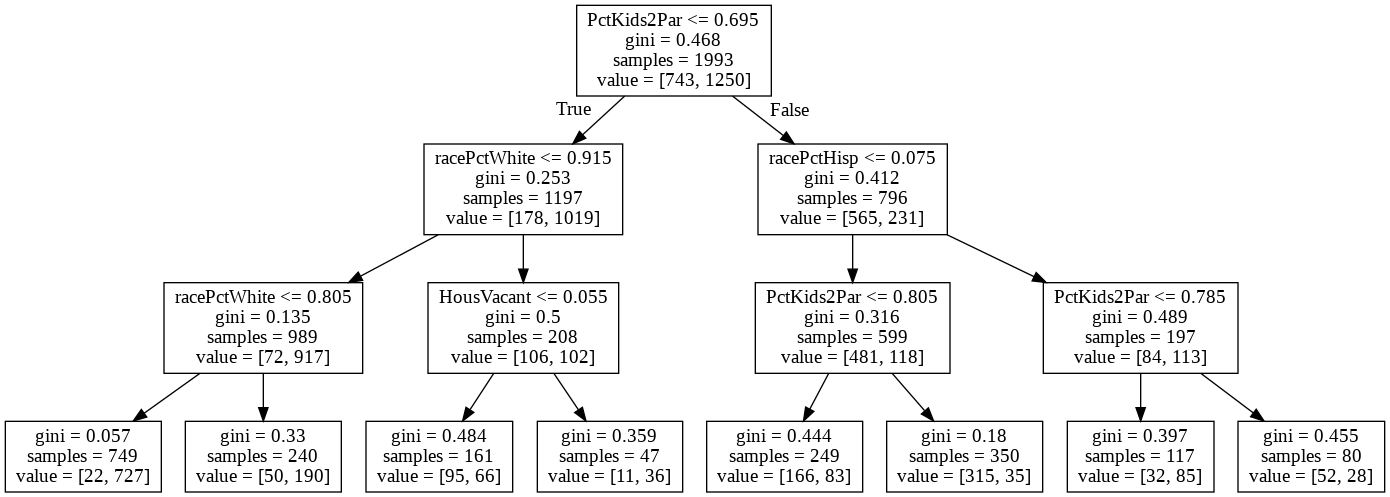

In [0]:
dot_data = tree.export_graphviz(dt_clf, out_file=None,feature_names=list(X))

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [0]:

# We can check the main features used for classification by checking the feature importance, the higher the value,
# more important the feature would be.
# We can sort the importance scores in descending order and take the top most.
importances=dt_clf.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
# We have taken the top 5 feature 
print("The main features used for classification")
print(X.columns[indices[:5]])
print("Top main feature is",X.columns[indices[:1]][0])

Feature ranking:
The main features used for classification
Index(['PctKids2Par', 'racePctWhite', 'racePctHisp', 'HousVacant',
       'LemasPctOfficDrugUn'],
      dtype='object')
Top main feature is PctKids2Par
ERROR! Session/line number was not unique in database. History logging moved to new session 61


As we have seen that the accuracy is less,so we are using cross validation to increase accuracy

In [0]:
dt_cv_accuracy = cross_val_score(dt_clf, X, y, cv=10).mean()
dt_cv_precision= cross_val_score(dt_clf, X, y, cv=10, scoring='precision').mean()
dt_cv_recall = cross_val_score(dt_clf, X, y, cv=10, scoring='recall').mean()
print("Cross Validation Accuracy DT:", dt_cv_accuracy)
print("Cross Validation Recall DT:", dt_cv_precision)
print("Cross Validation Precision DT:", dt_cv_recall)

Cross Validation Accuracy DT: 0.7982437185929648
Cross Validation Recall DT: 0.8432674799594686
Cross Validation Precision DT: 0.8392


We use cross-validation to get a better estimate of the generalization error on new unseen data where as the common problem that is in Decision trees is overfitting, in which many training examples are fitting the training data perfectly or nearly perfectly which leads to an overly specific model and lower performance. Thus, we contrained the tree to include only up to three levels, since a simple tree is more general. Thus, the results obtained after specifying are more realistic. These results are different from cross validation results as the train and test data are different in cross validation on the other hand DT train on all the exmaples.